In [2]:
## Quantum Kick Top, alpha_z=alpha_y=1

import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg
import random as rd
import cmath
from scipy.stats import unitary_group
%matplotlib inline
plt.rcParams['figure.dpi'] = 80

In [ ]:
# Parameters
j = 1000 # angular momentum 
alpha_y = 1.
alpha_z = 1.
# tau_array = np.arange(0.1, 10.2, 1) # perturbation parameter
tau_array = ([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
h_bar = 1.

if (j*2)%2 == 0:
    m_step = 1
else:
    m_step = 1/2

m_array = np.arange(-j, j+1/2, 1)
m_array = m_array[::-1]
Jz = np.zeros((int(2*j+1), int(2*j+1)))
index = 0
for m in m_array:
    Jz[index, index] = h_bar*m
    index += 1
              
J_plus = np.zeros((int(2*j+1), int(2*j+1)))
J_minus = np.zeros((int(2*j+1), int(2*j+1)))
for m in m_array:
    for n in m_array:
        if m == n+1:
            J_plus[np.where(m_array == m), np.where(m_array == n)] = h_bar*math.sqrt(j*(j+1)-n*(n+1))
        if m == n-1:
            J_minus[np.where(m_array == m), np.where(m_array == n)] = h_bar*math.sqrt(j*(j+1)-n*(n-1))
            
Jy = 1j*(J_minus-J_plus)/2

In [ ]:
## Histogram of the angles of eigenvalues of the Floquet operator

for tau_z in tau_array:
    F = np.dot(scipy.linalg.expm((-tau_z*1j*np.dot(Jz, Jz))/(2*j+1)-1j*alpha_z*Jz), scipy.linalg.expm(-1j*alpha_y*(Jy)))
    print(F)
    eig_array = np.linalg.eigvals(F)
    # print(eig_array)
    for eig in eig_array:
        eig_array[np.where(eig_array == eig)] = np.angle(eig)
    # print(eig_array)
    eig_array = np.sort(eig_array)
    # print(eig_array)

    plt.hist(eig_array, 75, facecolor='blue', alpha=0.8)
    plt.xlabel('Angles of the Eigenvalues in Radians')
    plt.ylabel('Number of Eigenvalues')
    plt.title('Perturbation Parameter: tau = '+str(tau_z))
    plt.show()

In [ ]:
## Histogram of the distance between angles of eigenvalues of the Floquet operator

for tau_z in tau_array:
    F = np.dot(scipy.linalg.expm((-tau_z*1j*np.dot(Jz, Jz))/(2*j+1)-1j*alpha_z*Jz), scipy.linalg.expm(-1j*alpha_y*(Jy)))
    # print(F)
    eig_array = np.linalg.eigvals(F)
    # print(eig_array)
    for eig in eig_array:
        eig_array[np.where(eig_array == eig)] = np.angle(eig)
    # print(eig_array)
    eig_array = np.sort(eig_array)
    # print(eig_array)
    i = 0
    eig_neighborhood = ([])
    while i < len(eig_array)-1:
#         print(eig_array[i])
#         print(eig_array[i+1])
#         print(eig_array[i+1]-eig_array[i])
#         print(" ")
        eig_neighborhood = np.append(eig_neighborhood, eig_array[i+1]-eig_array[i])
        i += 1
 
    plt.hist(eig_neighborhood, 100, facecolor='blue', alpha=0.8, range=(0, 0.035), density=True)
    plt.xlabel('Distance Between Angles of the Eigenvalues in Radians')
    plt.ylabel('Number of Eigenvalues')
    plt.title('Neighborhood - Perturbation Parameter: tau = '+str(tau_z))
    plt.show()

In [3]:
## Random Floquet Operators, Diagonal and non-Diagonal

j = 1000
N = 2*j+1 # Matrix dimensions

F_d = np.empty((int(N), int(N)), dtype=complex) # F_d - Floquet diagonal
for m in np.arange(N):
    for n in np.arange(N):
        if m != n:
            F_d[m, n] = 0
        if m == n:
            F_d[m, n] = cmath.exp(-1j*np.random.uniform(-3.1415926, 3.1415926))

F_nd = unitary_group.rvs(N) # F_nd - Floquet non-diagonal
# print(F_nd)
# print(np.dot(F_nd, np.conj(np.transpose(F_nd))))

F_d_eigs = np.linalg.eigvals(F_d)
for eig in F_d_eigs:
    F_d_eigs[np.where(F_d_eigs == eig)] = np.angle(eig)
F_d_eigs = np.sort(F_d_eigs)
F_nd_eigs = np.linalg.eigvals(F_nd)
for eig in F_nd_eigs:
    F_nd_eigs[np.where(F_nd_eigs == eig)] = np.angle(eig)
F_nd_eigs = np.sort(F_nd_eigs)

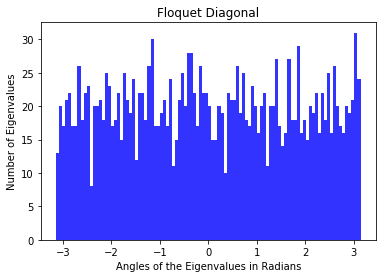

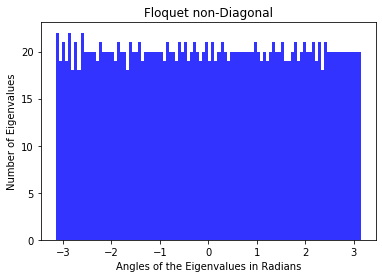

In [15]:
n, bins, patches = plt.hist(F_d_eigs, 100, facecolor='blue', alpha=0.8)
plt.xlabel('Angles of the Eigenvalues in Radians')
plt.ylabel('Number of Eigenvalues')
plt.title('Floquet Diagonal')
plt.show()

n, bins, patches = plt.hist(F_nd_eigs, 100, facecolor='blue', alpha=0.8)
plt.xlabel('Angles of the Eigenvalues in Radians')
plt.ylabel('Number of Eigenvalues')
plt.title('Floquet non-Diagonal')
plt.show()

/home/gjjt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
/home/gjjt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/home/gjjt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/gjjt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:897: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/home/gjjt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/gjjt/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959

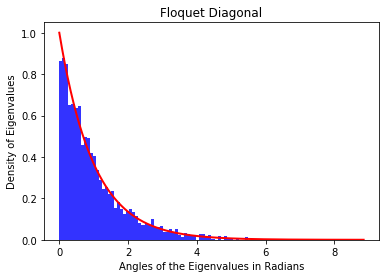

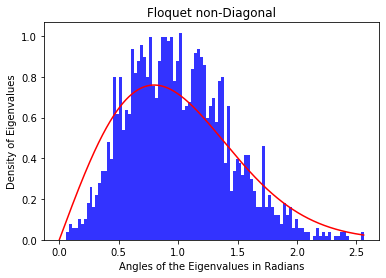

In [4]:
i = 0
F_d_neigh = ([])
while i < len(F_d_eigs)-1:
    F_d_neigh = np.append(F_d_neigh, F_d_eigs[i+1]-F_d_eigs[i])
    i += 1
i = 0
F_nd_neigh = ([])
while i < len(F_nd_eigs)-1:
    F_nd_neigh = np.append(F_nd_neigh, F_nd_eigs[i+1]-F_nd_eigs[i])
    i += 1

F_d_neigh = F_d_neigh/(2*3.1415926)*(2*j+1)
F_nd_neigh = F_nd_neigh/(2*3.1415926)*(2*j+1)
# print(np.amax(F_d_neigh))

d_d = np.arange(0.0, float(np.amax(F_d_neigh)), float(np.amin(F_d_neigh)))
Fit_d = [math.exp(-s) for s in d_d]
d_nd = np.arange(0.0, float(np.amax(F_nd_neigh)), float(np.amin(F_nd_neigh))/1000)  
Fit_nd = [(3.1415926*s/2)*math.exp(-3.1415926*(s**2)/4) for s in d_nd]

plt.xlabel('Angles of the Eigenvalues in Radians')
plt.ylabel('Density of Eigenvalues')
plt.title('Floquet Diagonal')
plt.hist(F_d_neigh, 100, facecolor='blue', alpha=0.8, density=True)
plt.plot(d_d, Fit_d, lw=2, color="red")
plt.show()

plt.xlabel('Angles of the Eigenvalues in Radians')
plt.ylabel('Density of Eigenvalues')
plt.title('Floquet non-Diagonal')
plt.hist(F_nd_neigh, 100, facecolor='blue', alpha=0.8, density=True)
plt.plot(d_nd, Fit_nd, color="red")
plt.show()